In [1]:
IRdisplay::display_html('<style>.container { width:90% !important; }</style>')

In [2]:
#install.packages("tidyr")
#install.packages("ggfortify")
#install.packages("ggrepel")
#install.packages("BiocManager")
#install.packages("WebGestaltR")
#Sys.setenv(R_INSTALL_STAGED = FALSE)
#BiocManager::install("DESeq2")
#BiocManager::install("cowplot")

In [3]:
# make countMatrices with 
#.../pathogen_pipeline/makeBenchmarkDataframe.ipynb

library(tidyr)
library(DESeq2)
library(ggplot2)
library(reshape2)
library(dplyr)
library(Rtsne)
library(caret)
library(ggfortify)
library(ggrepel)
library(WebGestaltR)
library(RCurl)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [4]:
preparePCAplots = function(pca, metadata_of_interest){

    data_to_plot <- cbind(data.frame(PC1 = pca$x[,1], PC2 = pca$x[,2]), metadata_of_interest)
    features_to_plot <- setdiff(colnames(data_to_plot), c("PC1", "PC2"))
    features_to_plot <- setNames(features_to_plot, features_to_plot)
    all_plots_pca <- lapply(features_to_plot,
           function(col) {
                        gg = ggplot(data = data_to_plot) +
                        geom_point(aes(x = PC1, y = PC2, color = !!sym(col)), size = 5) +
                        theme(legend.position = "bottom", legend.margin=margin(t=0, unit="pt"),  
                              text = element_text(size=14), 
                              legend.title = element_text(size = 10),
                        legend.text = element_text(size = 10)) + xlab("") + ylab("") # xlim(-5,5) + ylim(-5,5)+ 
                        if (class(data_to_plot[,col]) == "factor")
                        gg = gg + guides(colour = guide_legend(title.position = "top", nrow = 2))
                        if (class(data_to_plot[,col]) == "character")
                        gg = gg + guides(colour = guide_legend(title.position = "top", nrow = 3))
                          
           return(gg)}
    )
    return(all_plots_pca)
}

In [5]:
inputfolder = "~/Pathonoia/OUTPUT/PSC/"
ds = "kfo_kiel_60_liver_patients"

# PSC mRNA

In [6]:
pca_outlier = c()

In [7]:
counts = read.table(paste0(inputfolder,ds,"_contamination_aggregated.csv"), sep = ",", header=TRUE, check.names = FALSE, row.names = "")

if(exists("pca_outlier")){
    print(pca_outlier)
    counts = counts[,!(colnames(counts) %in% pca_outlier)]
} else {
    pca_outlier = c()
}

pathoInfoCols = c("species_name","phylo_level","parent")
pathoInfo = counts[pathoInfoCols]
counts = counts[,!colnames(counts) %in% pathoInfoCols]

counts[is.na(counts)]=0
counts

 [1] "F12271" "F12285" "F12332" "F12289" "F12292" "F12278" "F12324" "F12293"
 [9] "F12277" "F12317" "F12269" "F12253"


,F12246,F12247,F12248,F12249,F12250,F12252,F12254,F12255,F12257,F12260,⋯,F12320,F12321,F12323,F12326,F12327,F12328,F12329,F12331,F12333,F12339
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1969841,21641,13882,25639,20658,45659,23996,31570,28902,37521,30918,⋯,40708,43505,39794,40638,53596,47526,32223,31388,52591,71251
29382,27007,24926,32900,28614,26261,35385,25081,24306,36310,29124,⋯,37519,30363,22334,22072,29035,34044,29302,22617,38219,28913
1283,25502,24867,30654,27725,25522,34421,23942,23309,35576,28832,⋯,36660,30157,22255,21944,28613,33845,29345,23086,37630,28729
1280,24147,25305,28015,25777,24520,73503,22946,21993,32992,27421,⋯,32668,26430,19461,19143,25116,30107,25915,20161,35411,26756
1286,21948,21454,25954,23768,21758,29515,20485,20054,31043,24790,⋯,31678,0,18385,0,24013,28413,25162,0,0,24567
1457195,22834,21011,27651,23579,23525,61389,22458,22064,31783,27747,⋯,28077,23473,18014,17489,21398,23992,17597,15056,20901,20157
305,22357,20570,27102,22956,22974,60765,21869,21439,31161,27233,⋯,27709,23107,17756,17126,21102,23587,17338,14763,20567,19682
72407,19804,20339,21947,21804,23735,41542,21140,17823,28420,23345,⋯,22513,22078,22158,14708,19726,26601,13904,20255,18613,31027
1747,1538,3810,3452,8920,2365,9283,2082,1696,3561,2644,⋯,43285,27340,20539,20264,26386,31465,21801,17695,27071,34629


In [8]:
numberOfZerosAllowed = length(counts)*0.99
counts_lessSparse = counts[!(rowSums(counts == 0) > numberOfZerosAllowed),]
table(duplicated(counts_lessSparse))
counts = counts_lessSparse


FALSE  TRUE 
  651     2 

In [9]:
metadata = read.table(paste0(inputfolder,"KFO60_metadata.csv"), sep=",", header=TRUE)
rownames(metadata) = metadata$sample
metadata = metadata[colnames(counts),]

metadata$fibrosis = gsub('1-2', '1.5', metadata$fibrosis)
metadata$fibrosis = gsub('0-1', '0.5', metadata$fibrosis)
metadata$fibrosis = gsub('2-3', '0.5', metadata$fibrosis)
metadata$fibrosis = as.numeric(metadata$"fibrosis")
metadata

colnames(metadata)

,pseudonym,sex,birthdate,age,date.bx,diagnosis,fibrosis,mHAI,Interface,confluent.Necrosis,⋯,Prednisolon.bx.1,UDCA.bx,Mesalazin.bx,hepatic.decompensation.ever,Cholestase.stenosis.ever.MRT,Cholangitiden.clinical.ever,Pfortaderthrombose.ever,GB.carcinoma,date.GBC,Nachverfolgung.bis
,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
F12246,DAQHBO,2,20.06.1971,41,18.02.2013,PBC,1.0,2,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,
F12247,KSMTKO,1,15.10.1984,30,10.12.2014,PSC,2.0,4,1,0,⋯,0,0,0,0,1,0,0,0,NA,01/01/2015
F12248,KQGQJN,2,15.12.1956,56,29.11.2013,AIH,1.0,7,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,
F12249,FLYJDY,2,15.09.1961,53,10.06.2015,AIH,2.0,12,4,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,
F12250,NPLQMM,1,15.10.1970,44,07.01.2015,PSC,2.0,2,0,0,⋯,0,0,0,0,1,0,0,0,NA,01/01/2016
F12252,JHJNIE,2,15.11.1991,23,26.10.2015,NASH,1.0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,
F12254,SQMDQN,1,15.10.1973,40,29.11.2013,PBC,0.0,4,1,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,
F12255,POGCDG,1,15.09.1990,24,27.03.2015,PSC,3.0,NA,NA,NA,⋯,0,1000,0,0,1,0,0,0,NA,01/01/2016
F12257,SHLELG,1,15.07.1980,31,12.10.2011,PSC,1.0,1,0,0,⋯,0,0,0,0,0,0,0,0,NA,01/01/2012


[1] "pseudonym"                    "sex"                         
 [3] "birthdate"                    "age"                         
 [5] "date.bx"                      "diagnosis"                   
 [7] "fibrosis"                     "mHAI"                        
 [9] "Interface"                    "confluent.Necrosis"          
[11] "Apoptosis"                    "portal.Inflammation"         
[13] "sample"                       "Hb"                          
[15] "Platelets"                    "Albumin"                     
[17] "Bili"                         "Kreatinin"                   
[19] "AST"                          "ALT"                         
[21] "GGT"                          "AP"                          
[23] "IGG"                          "INR"                         
[25] "Prednisolon.bx"               "Azathioprin.bx"              
[27] "others"                       "immunosuppression"           
[29] "follow.up"                    "steatosis.percent"           
[31] "NASH"                         "NAS"                         
[33] "Fibroscan"                    "IQR"                         
[35] "CAP..IQR."                    "date.fibroscan"              
[37] "UDCA"                         "Fibrate"                     
[39] "other.autoimmune.disease"     "IBD"                         
[41] "adverse.outcome"              "date"                        
[43] "comment"                      "ANA"                         
[45] "AMA"                          "SMA"                         
[47] "LKM"                          "SLA"                         
[49] "date.diagnosis"               "CCA"                         
[51] "CCA.date"                     "LTX"                         
[53] "LTX.date"                     "LTX.indication"              
[55] "cirrhosis.LTX"                "CED.ever"                    
[57] "CED.ED"                       "CU"                          
[59] "MC"                           "Prednisolon.bx.1"            
[61] "UDCA.bx"                      "Mesalazin.bx"                
[63] "hepatic.decompensation.ever"  "Cholestase.stenosis.ever.MRT"
[65] "Cholangitiden.clinical.ever"  "Pfortaderthrombose.ever"     
[67] "GB.carcinoma"                 "date.GBC"                    
[69] "Nachverfolgung.bis"

In [10]:
cols_of_interest = c("sex",'age','diagnosis','fibrosis','mHAI')
metadata_of_interest = metadata[rownames(t(counts)),cols_of_interest]
metadata_of_interest

,sex,age,diagnosis,fibrosis,mHAI
,<int>,<int>,<fct>,<dbl>,<int>
F12246,2,41,PBC,1.0,2
F12247,1,30,PSC,2.0,4
F12248,2,56,AIH,1.0,7
F12249,2,53,AIH,2.0,12
F12250,1,44,PSC,2.0,2
F12252,2,23,NASH,1.0,NA
F12254,1,40,PBC,0.0,4
F12255,1,24,PSC,3.0,NA
F12257,1,31,PSC,1.0,1


In [11]:
metadata_of_interest = cbind(metadata_of_interest,t(counts["43768",rownames(metadata_of_interest)]))
metadata_of_interest = cbind(metadata_of_interest,t(counts["1858609",rownames(metadata_of_interest)]))
#etadata_of_interest = cbind(metadata_of_interest,t(counts["2047",rownames(metadata_of_interest)]))
#metadata_of_interest$"1286" = as.factor(metadata_of_interest$"1286")
#etadata_of_interest$"2047" = as.factor(metadata_of_interest$"2047")
#metadata_of_interest$FLOWCELL = gsub('.{5}$', '', metadata_of_interest$FLOWCELL)
metadata_of_interest

,sex,age,diagnosis,fibrosis,mHAI,43768,1858609
,<int>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>
F12246,2,41,PBC,1.0,2,0,0
F12247,1,30,PSC,2.0,4,644,0
F12248,2,56,AIH,1.0,7,0,0
F12249,2,53,AIH,2.0,12,0,0
F12250,1,44,PSC,2.0,2,770,0
F12252,2,23,NASH,1.0,NA,0,0
F12254,1,40,PBC,0.0,4,0,0
F12255,1,24,PSC,3.0,NA,0,0
F12257,1,31,PSC,1.0,1,790,0


# PCA and TSNE

null device 
          1

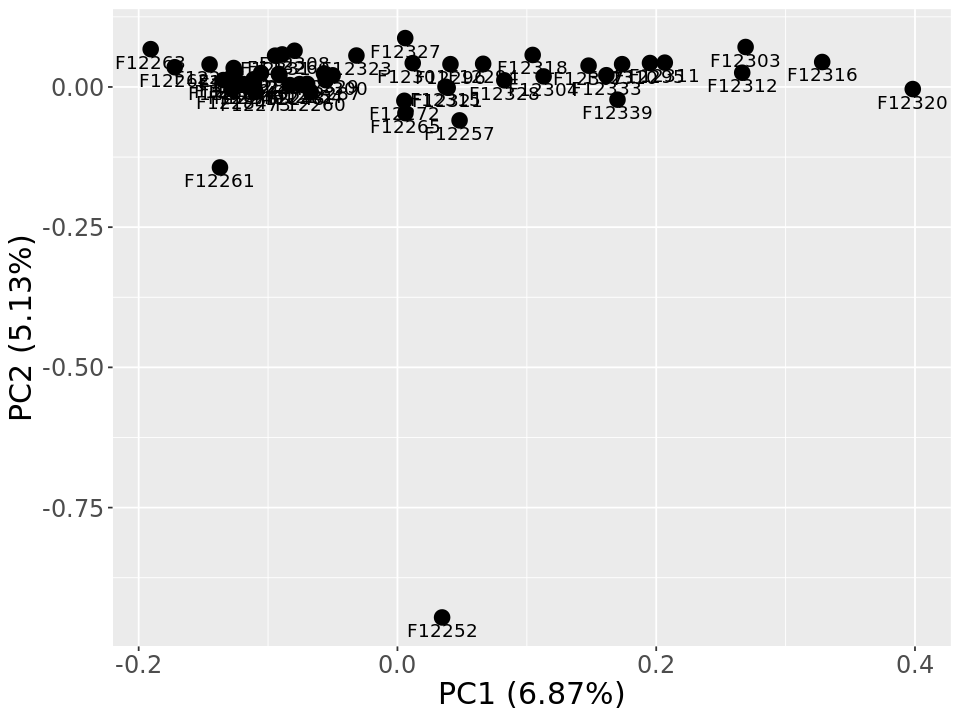

In [12]:
pca <- prcomp(t(counts), scale = TRUE)

options(repr.plot.width=8, repr.plot.height=6)
#plot(pca)
#pdf("psc_pca_afterOutlierRemoval.pdf", height = 6, width = 7)
#pdf("psc_pca_beforeOutlierRemoval.pdf", height = 6, width = 7)
autoplot(pca, label = TRUE, size = 4, label.vjust = 1.5) + theme(text = element_text(size=18))
dev.off()
#pcadf = cbind(as.data.frame(pca$x),label=rownames(metadata_of_interest))
#ggplot(data = pcadf, aes(x = PC1, y = PC2, label=label)) + geom_point()  + geom_text(size=5)

all_plots_pca = preparePCAplots(pca,metadata_of_interest)

In [6]:
pca_outlier = c('F12271','F12285','F12332', 'F12289', 'F12292', 'F12278', 'F12324', 'F12293', 'F12277', 'F12317', 'F12269', 'F12253')#, 'F12252')
#pca_outlier = c()

In [13]:
counts = read.table(paste0(inputfolder,ds,"_contamination_aggregated.csv"), sep = ",", header=TRUE, check.names = FALSE, row.names = "")

counts = counts[,!(colnames(counts) %in% pca_outlier)]
pathoInfo = counts[pathoInfoCols]
counts = counts[,!colnames(counts) %in% pathoInfoCols]

counts[is.na(counts)]=0

numberOfZerosAllowed = length(counts)*0.99
counts_lessSparse = counts[!(rowSums(counts == 0) > numberOfZerosAllowed),]
table(duplicated(counts_lessSparse))
counts = counts_lessSparse

metadata = read.table(paste0(inputfolder,"KFO60_metadata.csv"), sep=",", header=TRUE)
rownames(metadata) = metadata$sample
metadata = metadata[colnames(counts),]
metadata$fibrosis = gsub('1-2', '1.5', metadata$fibrosis)
metadata$fibrosis = gsub('0-1', '0.5', metadata$fibrosis)
metadata$fibrosis = gsub('2-3', '0.5', metadata$fibrosis)
metadata$fibrosis = as.numeric(metadata$"fibrosis")
cols_of_interest = c("sex",'age','diagnosis','fibrosis','mHAI')
metadata_of_interest = metadata[rownames(t(counts)),cols_of_interest]



FALSE  TRUE 
  651     2 

null device 
          1

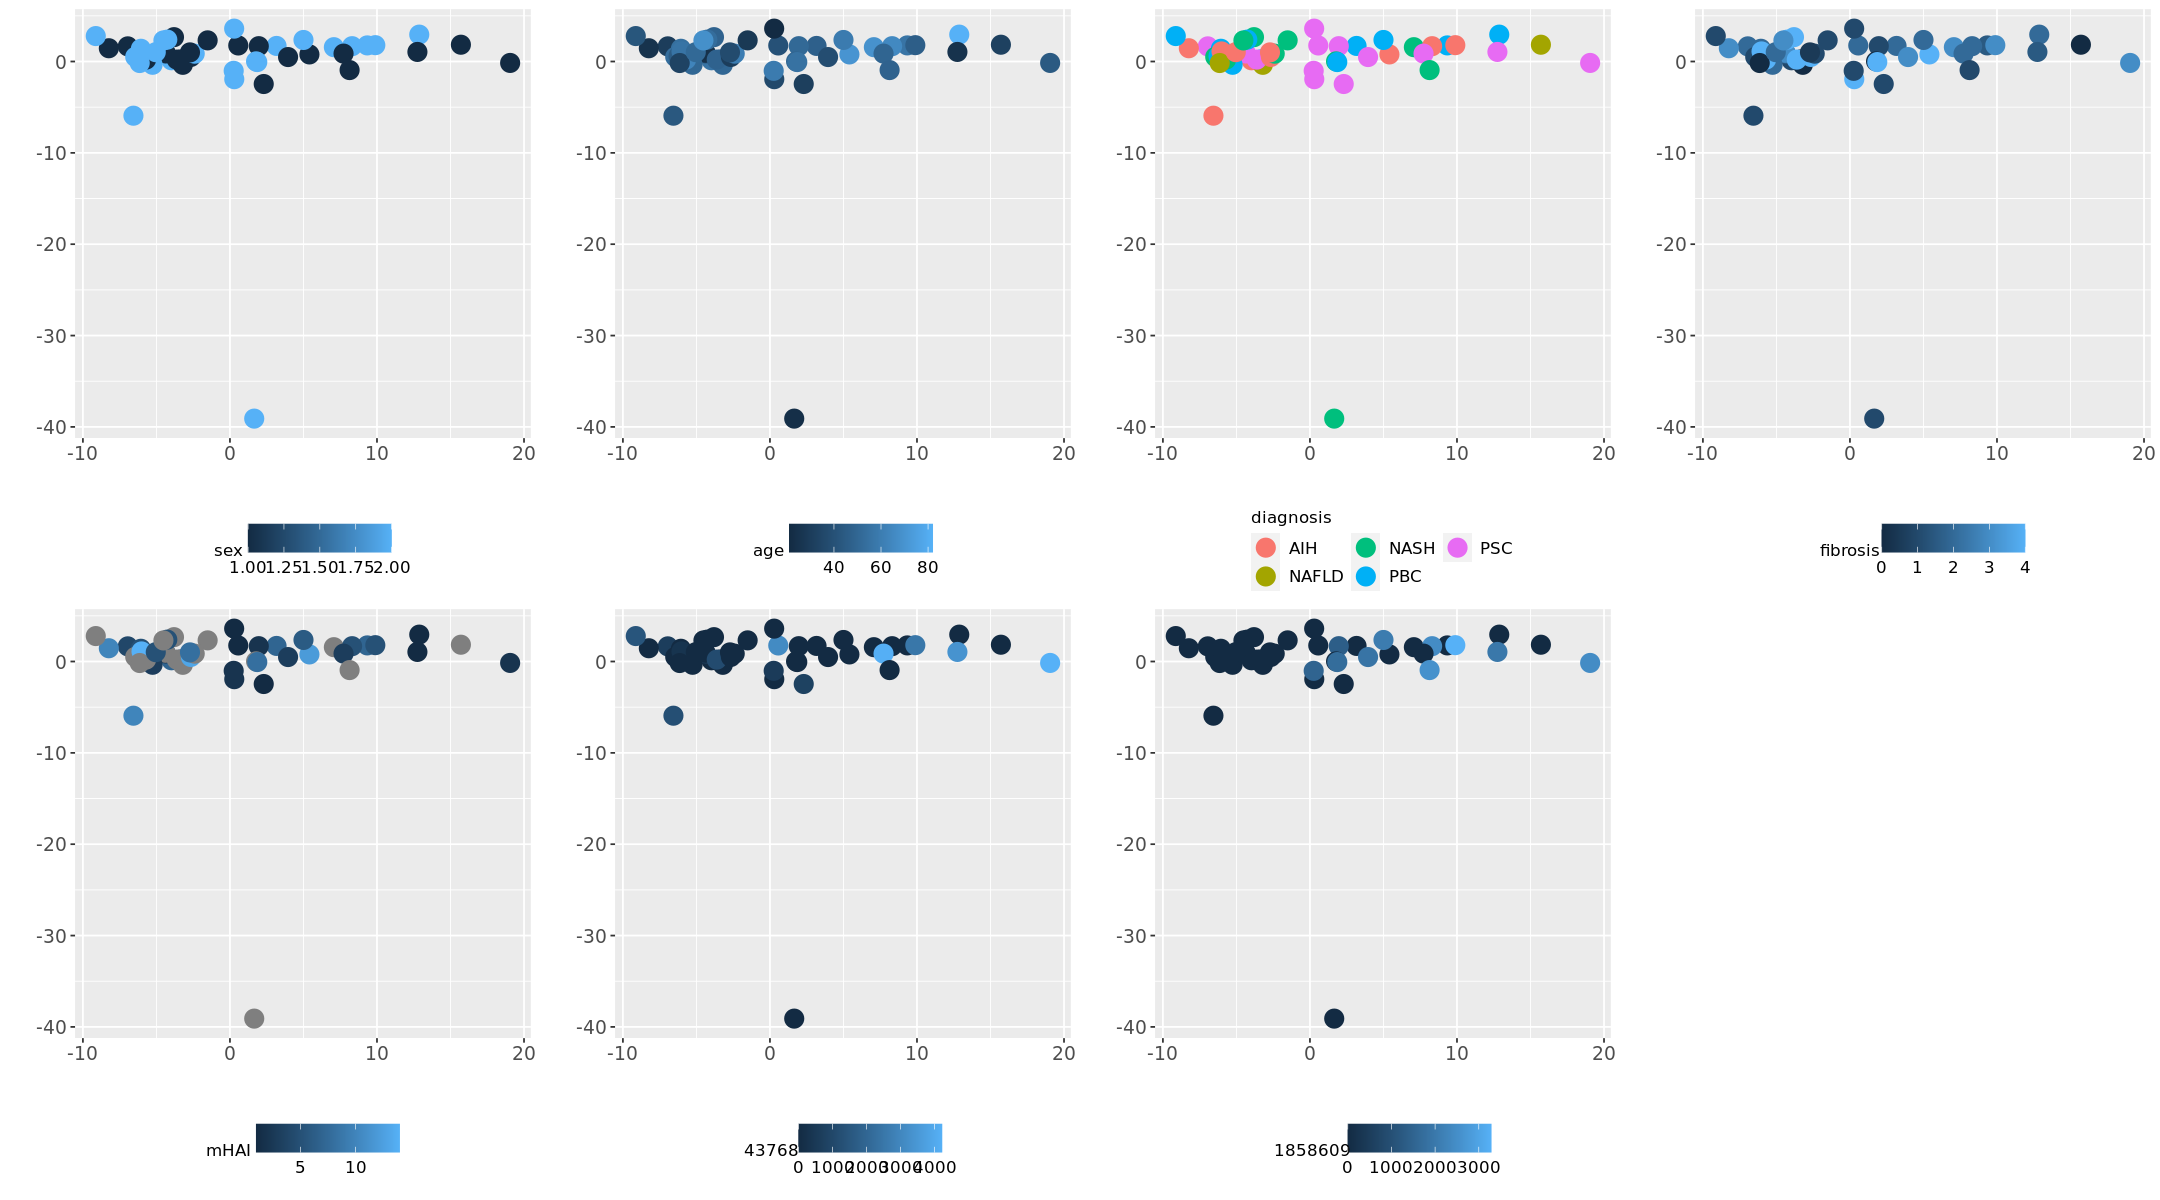

In [14]:
options(repr.plot.width=18, repr.plot.height=10)
#pdf("psc_pca_colored.pdf", height = 10, width = 18)
cowplot::plot_grid(plotlist = all_plots_pca, ncol = 4, align = "h") 
dev.off()

# Differential Expression

In [15]:
metadata$DE_GROUP = metadata$fibrosis < 1
metadata

,pseudonym,sex,birthdate,age,date.bx,diagnosis,fibrosis,mHAI,Interface,confluent.Necrosis,⋯,UDCA.bx,Mesalazin.bx,hepatic.decompensation.ever,Cholestase.stenosis.ever.MRT,Cholangitiden.clinical.ever,Pfortaderthrombose.ever,GB.carcinoma,date.GBC,Nachverfolgung.bis,DE_GROUP
,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<lgl>
F12246,DAQHBO,2,20.06.1971,41,18.02.2013,PBC,1.0,2,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,,,FALSE
F12247,KSMTKO,1,15.10.1984,30,10.12.2014,PSC,2.0,4,1,0,⋯,0,0,0,1,0,0,0,NA,01/01/2015,FALSE
F12248,KQGQJN,2,15.12.1956,56,29.11.2013,AIH,1.0,7,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,,,FALSE
F12249,FLYJDY,2,15.09.1961,53,10.06.2015,AIH,2.0,12,4,1,⋯,NA,NA,NA,NA,NA,NA,NA,,,FALSE
F12250,NPLQMM,1,15.10.1970,44,07.01.2015,PSC,2.0,2,0,0,⋯,0,0,0,1,0,0,0,NA,01/01/2016,FALSE
F12252,JHJNIE,2,15.11.1991,23,26.10.2015,NASH,1.0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,,,FALSE
F12254,SQMDQN,1,15.10.1973,40,29.11.2013,PBC,0.0,4,1,0,⋯,NA,NA,NA,NA,NA,NA,NA,,,TRUE
F12255,POGCDG,1,15.09.1990,24,27.03.2015,PSC,3.0,NA,NA,NA,⋯,1000,0,0,1,0,0,0,NA,01/01/2016,FALSE
F12257,SHLELG,1,15.07.1980,31,12.10.2011,PSC,1.0,1,0,0,⋯,0,0,0,0,0,0,0,NA,01/01/2012,FALSE


In [16]:
samples = rownames(metadata_of_interest)
dds <- DESeqDataSetFromMatrix(countData = counts[,rownames(metadata)],
                              colData = metadata,
                              design= ~ DE_GROUP)
dds <- DESeq(dds)
resultsNames(dds) 

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 495 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"    "DE_GROUPTRUE"

In [25]:
deres = as.data.frame(results(dds, name=resultsNames(dds)[2]))
r = cbind(pathoInfo[rownames(deres),pathoInfoCols],deres)
r = r[r$padj<0.05 & !is.na(r$padj),]
r = r[order(r$padj),]
#r = r[1:10,]
#rownames(r) = make.names(r$species_name)
#r = r[order(r$log2FoldChange),]
r#[grepl("S",r$phylo_level),]
#write.table(r,"PSC_DE_bugs.csv")

,species_name,phylo_level,parent,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43768,Corynebacterium matruchotii,S,1716,426.40649,-26.43545,3.348853,-7.893883,2.929267e-15,2.929267e-13
1858609,Acidovorax sp. T1,S,2684926,340.59224,-29.98269,3.794328,-7.901975,2.745174e-15,2.929267e-13
71999,Kocuria palustris,S,57493,98.11371,-24.42146,3.304675,-7.389971,1.468604e-13,9.790692e-12
28037,Streptococcus mitis,S,1301,644.29336,-27.84560,3.878106,-7.180206,6.960624e-13,3.480312e-11
2014534,Microbacterium sp. PM5,S,2609290,117.95997,-24.62277,3.487629,-7.060032,1.664649e-12,6.658595e-11
1114967,Cutibacterium acnes TypeIA2 P.acn17,S2,1734925,4480.34937,-29.65474,4.262719,-6.956766,3.481717e-12,9.035843e-11
1211579,Pseudomonas putida NBRC 14164,S1,303,888.66320,-27.40353,3.923167,-6.985054,2.847462e-12,9.035843e-11
1499308,Paracoccus mutanolyticus,S,265,170.86412,-24.68952,3.551684,-6.951496,3.614337e-12,9.035843e-11
440085,Methylorubrum extorquens CM4,S1,408,286.29685,-29.33461,4.262734,-6.881641,5.916685e-12,1.311916e-10


In [24]:
write.table(r,"PSC_DE_bugs.csv", sep=",")

In [22]:
r

,species_name,phylo_level,parent,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,posi_samples,log10_padj
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1858609,Acidovorax sp. T1,S,2684926,340.59224,-29.98269,3.794328,-7.901975,2.745174e-15,2.929267e-13,10,12.533241
1114967,Cutibacterium acnes TypeIA2 P.acn17,S2,1734925,4480.34937,-29.65474,4.262719,-6.956766,3.481717e-12,9.035843e-11,9,10.044031
440085,Methylorubrum extorquens CM4,S1,408,286.29685,-29.33461,4.262734,-6.881641,5.916685e-12,1.311916e-10,7,9.882094
28037,Streptococcus mitis,S,1301,644.29336,-27.84560,3.878106,-7.180206,6.960624e-13,3.480312e-11,10,10.458382
1211579,Pseudomonas putida NBRC 14164,S1,303,888.66320,-27.40353,3.923167,-6.985054,2.847462e-12,9.035843e-11,10,10.044031
1636603,Acinetobacter sp. ACNIH1,S,196816,692.24724,-27.15653,4.262724,-6.370698,1.881704e-10,3.136174e-09,7,8.503600
122355,Pseudomonas psychrophila,S,286,486.52295,-26.63228,4.262727,-6.247709,4.165180e-10,5.950257e-09,6,8.225464
43768,Corynebacterium matruchotii,S,1716,426.40649,-26.43545,3.348853,-7.893883,2.929267e-15,2.929267e-13,13,12.533241
47885,Pseudomonas oryzihabitans,S,136845,413.66173,-26.39935,4.262729,-6.193064,5.900588e-10,7.867450e-09,6,8.104166


In [31]:
options(repr.plot.width=18, repr.plot.height=12)
#printDEresults(counts, samples, r$species_names, rownames(r),metadata_of_interest, "DISEASE.CODE", plotFunction= geom_point())

t = counts[rownames(r[1:12,]),samples] 
t$organism = r[1:12,"species_name"]
t = gather(t, key = "sample", value = "expression", -organism)
t = cbind(t, cc = metadata_of_interest[t$sample,"fibrosis"])

#t$organism = gsub("GPTSA100-9 = DSM 17447", "", t$organism)
#t$cc = gsub("FTD-sporadic-TDP", "FTP-TDP", t$cc)

cbbPalette <- rep(c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"),10)

pdf("psc_countsTop9.pdf", height = 12, width = 18)

ggplot(t, aes(x = cc, y = expression)) + theme_minimal() + 
    geom_jitter(width = 0.15, size=5) +
    stat_summary(fun.y=mean, geom="point", shape=95, size=18, color="blue") + 
    stat_summary(fun.y=median, geom="point", shape=95, size=18, color="red") +
    theme(text = element_text(size=14), strip.text = element_text(size=18))+ 
    facet_wrap(facets = "organism", scales = "free", ncol=3) + 
    ggtitle(paste("red = median, blue = mean")) + xlab("Disease Code") + ylab("Pathonoia Nuc Count")
dev.off()


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


png 
  2

In [20]:
r = cbind(r, posi_samples = rowSums(counts[rownames(r),]>0))
r$log10_padj=-log10(r$padj)

null device 
          1

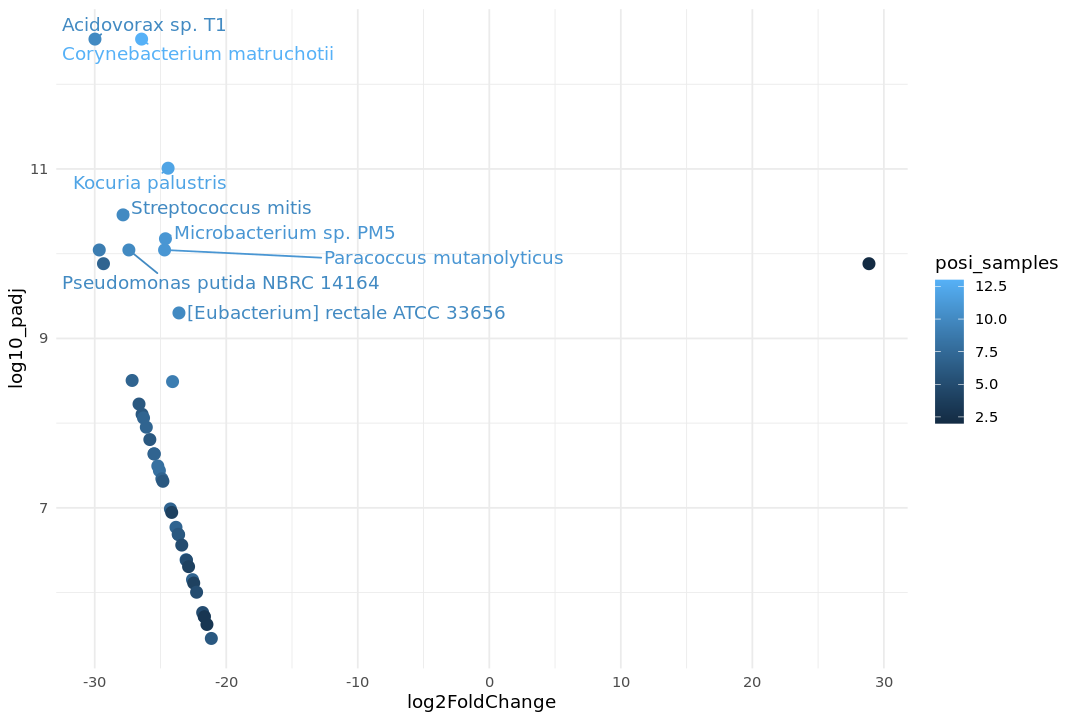

In [21]:
options(repr.plot.width=9, repr.plot.height=6)
#pdf("figures/psc_bac_volcano.pdf", height = 6, width = 9)
ggplot(r, aes(log2FoldChange, log10_padj, color= posi_samples, label=ifelse(posi_samples>9, as.character(species_name),""))) + geom_point(size=3) + theme_minimal() + geom_text_repel(min.segment.length = 0) 
dev.off()

## DE Transcriptome

In [23]:
genecounts = read.table("PSC_gene_count_summary.txt", header = TRUE, row.names = 1)


In [24]:
genecounts = genecounts[,samples]
genecounts

,F12246,F12247,F12248,F12249,F12250,F12252,F12254,F12255,F12257,F12260,⋯,F12320,F12321,F12323,F12326,F12327,F12328,F12329,F12331,F12333,F12339
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,1,0,2,0,0
ENSG00000227232.5,35,19,26,50,42,25,21,25,41,71,⋯,35,32,37,18,32,94,24,38,12,86
ENSG00000278267.1,3,0,2,5,6,1,0,0,2,5,⋯,0,3,6,0,0,9,0,4,2,13
ENSG00000243485.4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000268020.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000240361.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000186092.4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000238009.6,0,0,0,0,0,3,0,0,0,4,⋯,1,0,0,0,0,0,0,1,0,0


In [25]:
#metadata$GENE_DE =  as.factor(t(counts["43768",rownames(metadata)] > 0)) 19 genes
#metadata$GENE_DE =  as.factor(t(counts["1858609",rownames(metadata)] > 0)) # 0 genes
metadata$GENE_DE =  as.factor(t(counts["71999",rownames(metadata)] > 0)) # 0 genes

samples_gde = rownames(metadata[metadata$fibrosis >= 1,])
samples_gde
metadata_gde = metadata[samples_gde,]
genecounts = genecounts[,samples_gde]

[1] "F12246" "F12247" "F12248" "F12249" "F12250" "F12252" "F12255" "F12257"
 [9] "F12261" "F12262" "F12263" "F12265" "F12266" "F12268" "F12272" "F12273"
[17] "F12276" "F12279" "F12280" "F12281" "F12286" "F12287" "F12294" "F12295"
[25] "F12296" "F12300" "F12301" "F12303" "F12304" "F12307" "F12308" "F12310"
[33] "F12311" "F12312" "F12318" "F12320" "F12321" "F12323" "F12326" "F12327"
[41] "F12328" "F12331" "F12333" "F12339"

In [26]:
metadata_gde

,pseudonym,sex,birthdate,age,date.bx,diagnosis,fibrosis,mHAI,Interface,confluent.Necrosis,⋯,Mesalazin.bx,hepatic.decompensation.ever,Cholestase.stenosis.ever.MRT,Cholangitiden.clinical.ever,Pfortaderthrombose.ever,GB.carcinoma,date.GBC,Nachverfolgung.bis,DE_GROUP,GENE_DE
,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<lgl>,<fct>
F12246,DAQHBO,2,20.06.1971,41,18.02.2013,PBC,1.0,2,0,0,⋯,NA,NA,NA,NA,NA,NA,,,FALSE,TRUE
F12247,KSMTKO,1,15.10.1984,30,10.12.2014,PSC,2.0,4,1,0,⋯,0,0,1,0,0,0,NA,01/01/2015,FALSE,FALSE
F12248,KQGQJN,2,15.12.1956,56,29.11.2013,AIH,1.0,7,1,1,⋯,NA,NA,NA,NA,NA,NA,,,FALSE,TRUE
F12249,FLYJDY,2,15.09.1961,53,10.06.2015,AIH,2.0,12,4,1,⋯,NA,NA,NA,NA,NA,NA,,,FALSE,FALSE
F12250,NPLQMM,1,15.10.1970,44,07.01.2015,PSC,2.0,2,0,0,⋯,0,0,1,0,0,0,NA,01/01/2016,FALSE,FALSE
F12252,JHJNIE,2,15.11.1991,23,26.10.2015,NASH,1.0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,,,FALSE,TRUE
F12255,POGCDG,1,15.09.1990,24,27.03.2015,PSC,3.0,NA,NA,NA,⋯,0,0,1,0,0,0,NA,01/01/2016,FALSE,FALSE
F12257,SHLELG,1,15.07.1980,31,12.10.2011,PSC,1.0,1,0,0,⋯,0,0,0,0,0,0,NA,01/01/2012,FALSE,FALSE
F12261,MRRPFF,2,15.03.1971,43,12.11.2014,AIH,1.0,10,3,0,⋯,NA,NA,NA,NA,NA,NA,,,FALSE,FALSE


In [27]:
dds_g <- DESeqDataSetFromMatrix(countData = genecounts,
                              colData = metadata_gde,
                              design= ~ GENE_DE)
dds_g <- DESeq(dds_g)
resultsNames(dds_g) 

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 485 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"             "GENE_DE_TRUE_vs_FALSE"

In [28]:
gderes = as.data.frame(results(dds_g, name=resultsNames(dds_g)[2]))
gr = gderes[gderes$padj<0.05 & !is.na(gderes$padj),]
gr
#r = r[order(r$padj),]

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [31]:
upregulated_genes = sapply(strsplit(rownames(gr[gr$log2FoldChange > 0,]), ".", fixed=T), function(x) x[1])
downregulated_genes = sapply(strsplit(rownames(gr[gr$log2FoldChange < 0,]), ".", fixed=T), function(x) x[1])
regulated_genes = sapply(strsplit(rownames(gr), ".", fixed=T), function(x) x[1])
downregulated_genes

list()

In [63]:
length(regulated_genes)

[1] 0

In [129]:
WebGes_BioProc(upregulated_genes, "fibrosis_71999_upDEgenes")
WebGes_BioProc(downregulated_genes, "fibrosis_71999_downDEgenes")
WebGes_BioProc(regulated_genes, "fibrosis_71999_DEgenes")
WebGes_MolFun(upregulated_genes, "fibrosis_71999_upDEgenes")
WebGes_MolFun(downregulated_genes, "fibrosis_71999_downDEgenes")
WebGes_MolFun(regulated_genes, "fibrosis_71999_DEgenes")

Loading the functional categories...
Loading the ID list...
Loading the reference list...
Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“No significant gene set is identified based on FDR 0.05!”


NULL

In [124]:


#functions for new WebGestaltR version! old ones available in v2
WebGes_BioProc <- function(genes, projectname){
    WebGestaltR(enrichMethod="ORA", organism="hsapiens",
    enrichDatabase="geneontology_Biological_Process",
    interestGene=genes,interestGeneType="ensembl_gene_id",referenceGeneType="genesymbol",
    referenceSet="genome_protein-coding", minNum=5, maxNum=2000,
    fdrMethod="BH",sigMethod="fdr",fdrThr=0.05,topThr=10,reportNum=20,perNum=1000,
    nThreads=64,
    isOutput=TRUE,outputDirectory="GO_results/GO_Analysis_biolProcess_FDR05",projectName=projectname,
    dagColor="continuous",hostName="http://www.webgestalt.org/")
}

WebGes_MolFun <- function(genes, projectname){
    WebGestaltR(enrichMethod="ORA", organism="hsapiens",
    enrichDatabase="geneontology_Molecular_Function",
    interestGene=genes,interestGeneType="ensembl_gene_id",referenceGeneType="genesymbol",
    referenceSet="genome_protein-coding", minNum=5, maxNum=2000,
    fdrMethod="BH",sigMethod="fdr",fdrThr=0.05,topThr=10,reportNum=20,perNum=1000,
    nThreads=64,
    isOutput=TRUE,outputDirectory="GO_results/GO_Analysis_molFunction_FDR05",projectName=projectname,
    dagColor="continuous",hostName="http://www.webgestalt.org/")
}



### Dataset Information

In [42]:
options(repr.plot.width=6, repr.plot.height=4)
pdf("figures/psc_dsinfo.pdf", height = 6, width = 9)
ggplot(data = data.frame(metadata[c("diagnosis","fibrosis")]), aes(x=diagnosis, y=fibrosis)) + geom_dotplot(binaxis='y', stackdir='center', stackratio=1.1, dotsize=0.5) + theme_minimal()
dev.off()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



png 
  2

In [44]:
counts

,F12246,F12247,F12248,F12249,F12250,F12252,F12254,F12255,F12257,F12260,⋯,F12320,F12321,F12323,F12326,F12327,F12328,F12329,F12331,F12333,F12339
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1969841,21641,13882,25639,20658,45659,23996,31570,28902,37521,30918,⋯,40708,43505,39794,40638,53596,47526,32223,31388,52591,71251
29382,27007,24926,32900,28614,26261,35385,25081,24306,36310,29124,⋯,37519,30363,22334,22072,29035,34044,29302,22617,38219,28913
1283,25502,24867,30654,27725,25522,34421,23942,23309,35576,28832,⋯,36660,30157,22255,21944,28613,33845,29345,23086,37630,28729
1280,24147,25305,28015,25777,24520,73503,22946,21993,32992,27421,⋯,32668,26430,19461,19143,25116,30107,25915,20161,35411,26756
1286,21948,21454,25954,23768,21758,29515,20485,20054,31043,24790,⋯,31678,0,18385,0,24013,28413,25162,0,0,24567
1457195,22834,21011,27651,23579,23525,61389,22458,22064,31783,27747,⋯,28077,23473,18014,17489,21398,23992,17597,15056,20901,20157
305,22357,20570,27102,22956,22974,60765,21869,21439,31161,27233,⋯,27709,23107,17756,17126,21102,23587,17338,14763,20567,19682
72407,19804,20339,21947,21804,23735,41542,21140,17823,28420,23345,⋯,22513,22078,22158,14708,19726,26601,13904,20255,18613,31027
1747,1538,3810,3452,8920,2365,9283,2082,1696,3561,2644,⋯,43285,27340,20539,20264,26386,31465,21801,17695,27071,34629
